In [94]:
# importing necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
#!pip install imblearn
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#rom imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
rs = 12 ### setting a global random_state
pd.set_option('display.max_columns', None)

In [99]:
from src.cleaning import read_data, clean_data

In [100]:
data_path = r"C:\Users\brzro\concordia_bootcamp\bank_marketing\data\bank-additional\bank-additional-full.csv"
df = read_data(data_path)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [101]:
X,y = clean_data(df)


In [103]:
from src.split_scaled import double_split_scale

In [104]:
X_t_scaled, y_t, X_v_scaled, y_v, X_test_scaled, y_test = double_split_scale(X,y)

In [105]:
print(round(y.mean(),3))
print(round(y_t.mean(),3))
print(round(y_v.mean(),3))
print(round(y_test.mean(),3))


0.113
0.113
0.113
0.113


# EDA

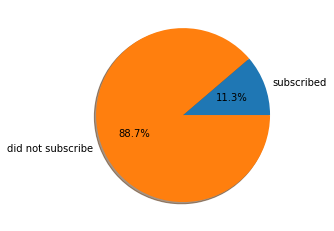

In [136]:
x = [len(df[df['y'] == 'yes'])/len(df), len(df[df['y'] == 'no'])/len(df) ]
plt.pie(x = x, labels=['subscribed', 'did not subscribe'], autopct='%.1f%%', shadow = 'yes');

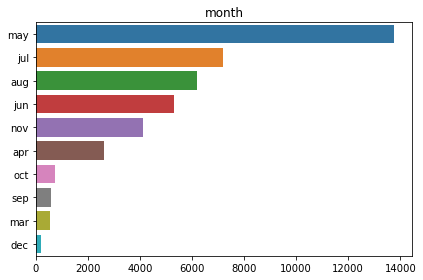

In [141]:
plt.figure(figsize=(6,4))
sns.barplot(df['month'].value_counts().values, df['month'].value_counts().index) # how to add hue
plt.title('month')
plt.tight_layout();

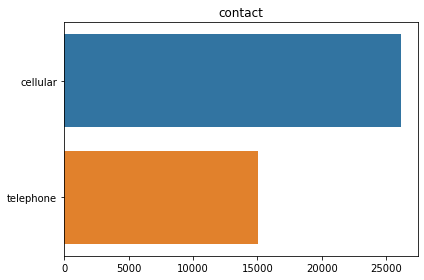

In [147]:
plt.figure(figsize=(6,4))
sns.barplot(df['contact'].value_counts().values, df['contact'].value_counts().index) # how to add hue
plt.title('contact')
plt.tight_layout();

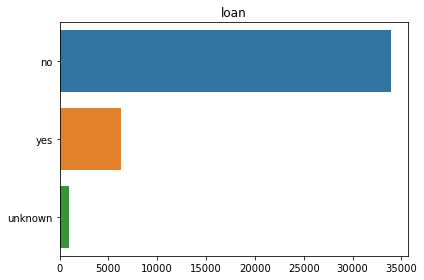

In [143]:
plt.figure(figsize=(6,4))
sns.barplot(df['loan'].value_counts().values, df['loan'].value_counts().index) # how to add hue
plt.title('loan')
plt.tight_layout();

# Machine Learning Models

### 1- Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import roc_auc_score
# import joblib

# def logistic_fit(X_t_scaled, y_t):
    
#     LR2=LogisticRegression(random_state= 12 , max_iter=1_000_000, class_weight = 'balanced')
#     print('logistic regression is done on the training set')
#     LR2.fit(X_t_scaled, y_t)
#     joblib.dump(LR2, 'LR.joblib')
    
    
    
# def logistic_predictor(s):
#     LR2 = joblib.load('LR.joblib')
#     pred_lr2 = LR2.predict(s)
#     return pred_lr2

# def logistic_predict_proba(s):
#     LR2 = joblib.load('LR.joblib')
#     pred_proba = LR2.predict_proba(s)[:,1]
#     return pred_proba

In [106]:
from src.log_reg_model import logistic_fit, logistic_predictor, logistic_predict_proba
logistic_fit(X_t_scaled, y_t)
pred_lr = logistic_predictor(X_v_scaled)
print('The Balanced Accuracy score of the Logistic Regression is:',
      round(balanced_accuracy_score(y_v, pred_lr)*100, 2),'%')


logistic regression is done on the training set
The Balanced Accuracy score of the Logistic Regression is: 72.06 %


In [108]:
pred_proba_lr = logistic_predict_proba(X_v_scaled)
AUC = roc_auc_score(y_v, pred_proba_lr)
print('The AUC of the logistic regression is:', round(AUC,2))

The AUC of the logistic regression is: 0.77


In [41]:
performance = {}
performance['Logistic Regression'] = round(AUC,3)


### 2 - Support Vector Machines

In [55]:
# import numpy as np
# import pandas as pd
# from sklearn.svm import SVC
# import joblib

# def svc_fit(X_t_scaled, y_t):
#     svc = SVC(random_state=12, class_weight='balanced')
#     svc.fit(X_t_scaled, y_t)
#     joblib.dump(svc, 'svc.joblib')
    
    
    
# def svc_predictor(X):
#     svc = joblib.load('svc.joblib')
#     pred = svc.predict(X)
#     return pred

# def svc_predict_proba(X):
#     svc = joblib.load('svc.joblib')
#     pred_proba = svc.predict_proba(X)[:,1]
#     return pred_proba

In [124]:
from src.svm_model import svc_fit, svc_predictor
svc_fit(X_t_scaled, y_t)
pred_svc = svc_predictor(X_v_scaled)
print('The Balanced Accuracy score of the SVC is:',
      round(balanced_accuracy_score(y_v, pred_svc)*100, 2),'%')

The Balanced Accuracy score of the SVC is: 72.63 %


### 3 - Decision Trees

In [69]:
# import numpy as np
# import pandas as pd
# import joblib
# from sklearn.tree import DecisionTreeClassifier



# def dt_fit(X_t_scaled, y_t):
#     tree_best = DecisionTreeClassifier(class_weight='balanced', max_depth=3,
#                        max_features='auto', random_state=12)
#     tree_best.fit(X_t_scaled, y_t)
#     joblib.dump(tree_best, 'tree_best.joblib')
    
# def dt_predictor(X):
#     tree_best = joblib.load('tree_best.joblib')
#     pred = tree_best.predict(X)
#     return pred
    
# def dt_predict_proba(X):
#     tree_best = joblib.load('tree_best.joblib')
#     pred_proba = tree_best.predict_proba(X)[:,1]
#     return pred_proba

In [126]:
from src.decision_tree import dt_fit, dt_predict_proba, dt_predictor
dt_fit(X_t_scaled, y_t)
pred_dt = dt_predictor(X_v_scaled)
print('The Balanced Accuracy score of the Decision Tree is:',
      round(balanced_accuracy_score(y_v, pred_dt)*100, 2),'%')

The Balanced Accuracy score of the Decision Tree is: 69.52 %


In [127]:
pred_proba_dt = dt_predict_proba(X_v_scaled)
AUC = roc_auc_score(y_v, pred_proba_dt)
print('The AUC of the Decision Tree is:', round(AUC,2))

The AUC of the Decision Tree is: 0.72


In [121]:
performance['Decision Tree'] = round(AUC,3)

### 4 - Ensemble

In [ ]:
# import numpy as np
# import pandas as pd
# import joblib
# from sklearn.ensemble import VotingClassifier

# def ensemble_fit(X_t_scaled, y_t):
#     LR2 = joblib.load('LR.joblib')
#     svc = joblib.load('svc.joblib')
#     tree_best = joblib.load('tree_best')
#     vot = VotingClassifier(
#     estimators=[('lr',LR2), ('svc', svc), ('tree', tree_best)],
#     voting = 'hard')
#     vot.fit(X_t_scaled, y_t)
#     joblib.dump(vot, 'vot.joblib')
    
# def ensemble_predictor(X):
#     vot = joblib.load('vot.joblib')
#     pred = vot.predict(X)
#     return pred
    
    
# def ensemble_predict_proba(X):
#     vot = joblib.load('vot.joblib')
#     pred_proba = vot.predict_proba(X)[:,1]
#     return pred_proba

In [144]:
from src.ens import ensemble_fit, ensemble_predictor, ensemble_predict_proba
ensemble_fit(X_t_scaled, y_t)
pred_ens = ensemble_predictor(X_v_scaled)
print('The Balanced Accuracy of the Ensemble is:',
     round(balanced_accuracy_score(y_v,pred_ens)*100,2))

The Balanced Accuracy of the Ensemble is: 72.08
